# Examining Drivers of Opioid-Related Overdose Deaths
Team members: Jessica Wu and Randy Pan

## Project Overview
The opioid crisis in the United States has long been a critical issue within the healthcare domain. However, addressing this issue is more important now than ever. Since 2013, there has been a rapid rise in overdose deaths driven by synthetic opioids–mainly, illegally-made fentanyl (CDC). Fentanyl is incredibly potent, which has escalated the number of unintentional overdose deaths dramatically as users are often unaware of its presence (NIDA). In order to slow this rapid rise in deaths, we must uncover the strongest drivers of opioid misuse. Only then can we develop effective solutions to take on this multifaceted challenge.

---

## Stakeholders
Healthcare providers and practitioners are significant stakeholders as they are the ones prescribing opioids as well as managing treatment for substance use disorder. Public health agencies are responsible for monitoring trends related to the opioid crisis and implementing interventions. Furthermore, policymakers would be interested in our analysis as they shape policies on opioid prescribing, substance abuse services, and social welfare. Community organizations that advocate for people struggling with substance use would also be invested in the results of our analysis to potentially help in their push for public health policy improvements. Researchers, particularly those trying to understand the interplay between social determinants of health (SDOH) and health outcomes, would also be key stakeholders. Finally, the affected communities—ranging from individuals battling addiction to families of overdose victims and communities facing the crisis—are important stakeholders as well. 

## Objective
This project seeks to delve into the multifaceted issue of opioid misuse and its fatal consequences by analyzing potential drivers of opioid-related overdose deaths at the county level. Through this examination, we aim to identify correlations between these factors and the incidence of opioid-related overdose deaths to hopefully inform targeted interventions, guide public health policies, and encourage further opioid misuse data sharing and collection as it remains a highly stigmatized issue worldwide.

## Detailed Project Description
We completed a descriptive analysis of the datasets as well as explored the link between opioid dispensing, overdose deaths, and SDOH factors to understand opioid prescribing and overdose trends and their relationship with SDOH variables.
The 5 questions that will be answered through the project are: 
1. What are the areas with the highest opioid dispensing and overdose death rates? 
2. What is the historical trend of nationwide opioid dispensing rate and overdose death rate? How have some critical policies regarding opioid dispensing (if any) influenced the opioid dispensing rate? 
3. Is there a correlation between the opioid dispensing rate and overdose death rate? 
4. How do social determinants of health factors (including poverty levels and substance abuse services facility availability) influence overdose death rates? 
5. How do overdose death rates in urban areas compare to rural areas? 

The geographic scope of our project will include all counties in the fifty United States. The timeframe of our analysis will be longitudinal when examining the relationship between opioid dispensing and overdose death rates. For SDOH factors, we will examine the most recent single year of data which is 2020 given that the more recent SDOH data has less missing values. 

## Methodology and Visualizations
### Datasets Used
|  Dataset  |  Source  |   Description |  Shape (rows, columns)  | % missing data | 
|:-------|:--------|:---------|:----------|:-----------|
| [U.S. County Opioid Dispensing Rates 2006-2020](https://www.cdc.gov/drugoverdose/rxrate-maps/index.html)  | CDC<sup>1</sup> | This dataset contains the opioid dispensing rates per 100 persons in the US at the county level from 2006 to 2020. This dataset is first scraped from the CDC website using web scraping methods and combined into a single dataframe with 43504 rows and 5 columns. The dataframe contains 3705 null values for the “Opioid dispensing rate per 100” column.  | (46585, 5)       |          1.60 |
| [Multiple Cause of Death, WONDER database (Opioid Overdose Death Dataset)](https://wonder.cdc.gov/controller/datarequest/D157) | CDC | This database allows users to acquire county-level death rate data by ICD-10 code. New York State Department of Health listed X40-X44, X60-X64, X85, Y10-Y14, T40.0, T40.1, T40.2, T40.3, T40.4, and T40.6 as ICD codes related to opioid use death and therefore are used as the search criteria. | (4913, 6)            |          0       |
| [Social Determinants of Health Database, County Data, 2020](https://www.ahrq.gov/sdoh/data-analytics/sdoh-data.html#download) | HHS AHRQ<sup>2</sup> | This dataset contains various SDOH variables for all US counties in 2020. This dataset contains 3228 rows and 681 columns. However, we used only the following SDOH variables in our analysis: RUCC code, rate of substance abuse services facilities, and percentage of population in poverty. |(3229, 682)          |          9.15 |
| [Poverty estimates for the U.S., States, and counties, 2021](https://www.ers.usda.gov/data-products/county-level-data-sets/county-level-data-sets-download-data/) | USDA ERS<sup>3</sup> | This dataset contains the national, state, and county-level poverty estimates as well as household income data for all counties in the U.S. The source of the data is the Small Area Income and Poverty Estimates (SAIPE) Program conducted by the U.S. Department of Commerce, Bureau of the Census. | (3143, 34)           |         17.68  |
| [**(Supplementary dataset)** Cartographic Boundary Files - Shapefile (2022), County level, resolution 1:500,000](https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html) | US Census Bureau | This dataset contains the cartographic geometry for all US counties at 1:500,000 resolution to plot choropleth maps. This dataset is processed using the geopandas package. This dataset has 3235 rows and 13 columns. This data contains no missing values. |(56, 5)              |          0       |

<small><sup>1</sup> Centers for Disease Control and Prevention\
<sup>2</sup> U.S. Department of Health and Human Services, Agency for Healthcare Research and Quality\
<sup>3</sup> U.S. Department of Agriculture Economic Research Service</small>

### **Opioid Overdose Death Rate Analysis**
#### Dataset Overview

The 2020 death rate dataset contains 989 rows and 5 columns (county name, county code, opioid overdose deaths, population, and crude overdose death rate).

#### Cleaning/Preprocessing

- “Notes” column was dropped as it does not contain relevant information for this project.
- There were 69 empty rows (null values in all columns) that were dropped
- The column representing the nationwide total was also dropped, leaving 919 rows
- 330 counties had unreliable death rates–we did not want to replace these with “0” or the median as this may impact the integrity of our analysis by distorting the actual nature of the data, especially when examining correlations with SDOH factors. Thus, we excluded counties with unreliable death rates from our analysis.
- We converted the death rate column to a float data type to allow for quantitative analysis

#### Visualizations and Insights

- We sorted the death rate dataframe by the “Crude Rate” column to show the counties with the highest overdose death rates.

| County              |   Crude Rate |   Population |   year |
|:--------------------|-------------:|-------------:|-------:|
| McDowell County, WV |       159.61 |      16916.0 |   2020 |
| Logan County, WV    |       138.85 |      31688.0 |   2020 |
| Baltimore city, MD  |       132.56 |     586131.0 |   2020 |
| Scioto County, OH   |       127.78 |      74347.0 |   2020 |
| Cabell County, WV   |       122.29 |      91589.0 |   2020 |
| Raleigh County, WV  |       117.94 |      72920.0 |   2020 |
| Wayne County, WV    |       117.79 |      39054.0 |   2020 |
| Petersburg city, VA |       108.39 |      30446.0 |   2020 |
| Cheatham County, TN |        94.89 |      41101.0 |   2020 |
| St. Louis city, MO  |        90.71 |     297645.0 |   2020 |
| Gallia County, OH   |        90.6  |      29802.0 |   2020 |
| Mingo County, WV    |        87.14 |      22951.0 |   2020 |
| Berkeley County, WV |        86.8  |     122125.0 |   2020 |
| Mercer County, WV   |        85.83 |      58258.0 |   2020 |
| Kanawha County, WV  |        85.67 |     176253.0 |   2020 |

- We also sorted the dataframe by the “Deaths” column to show the counties with the highest overdose death counts.

| County                  |   Deaths |   Population |   year |
|:------------------------|---------:|-------------:|-------:|
| Cook County, IL         |   1662.0 |    5108284.0 |   2020 |
| Los Angeles County, CA  |   1342.0 |    9943046.0 |   2020 |
| Maricopa County, AZ     |   1255.0 |    4579081.0 |   2020 |
| Philadelphia County, PA |    913.0 |    1578487.0 |   2020 |
| Baltimore city, MD      |    777.0 |     586131.0 |   2020 |
| Franklin County, OH     |    747.0 |    1324624.0 |   2020 |
| Wayne County, MI        |    709.0 |    1740623.0 |   2020 |
| Allegheny County, PA    |    569.0 |    1211358.0 |   2020 |
| Broward County, FL      |    555.0 |    1958105.0 |   2020 |
| San Diego County, CA    |    535.0 |    3332427.0 |   2020 |
| Orange County, CA       |    514.0 |    3166857.0 |   2020 |
| Harris County, TX       |    514.0 |    4738253.0 |   2020 |
| Marion County, IN       |    513.0 |     966183.0 |   2020 |
| Palm Beach County, FL   |    507.0 |    1507600.0 |   2020 |
| Bronx County, NY        |    495.0 |    1401142.0 |   2020 |

- For opioid dispensing rate, Norton County, VA has the highest dispensing rate in 2020 at 406.7 prescriptions. Norton County has also had the highest dispensing rate since 2012. 

| County           | State   |   County FIPS Code |   Opioid Dispensing Rate per 100 |   year |
|:-----------------|:--------|-------------------:|---------------------------------:|-------:|
| Martinsville, VA | VA      |              51690 |                            403.3 |   2006 |
| Martinsville, VA | VA      |              51690 |                            438.4 |   2007 |
| Martinsville, VA | VA      |              51690 |                            474.7 |   2008 |
| Martinsville, VA | VA      |              51690 |                            520.1 |   2009 |
| Martinsville, VA | VA      |              51690 |                            566.4 |   2010 |
| Martinsville, VA | VA      |              51690 |                            583.8 |   2011 |
| Norton, VA       | VA      |              51720 |                            570.1 |   2012 |
| Norton, VA       | VA      |              51720 |                            578.1 |   2013 |
| Norton, VA       | VA      |              51720 |                            563.3 |   2014 |
| Norton, VA       | VA      |              51720 |                            504.9 |   2015 |
| Norton, VA       | VA      |              51720 |                            470.3 |   2016 |
| NORTON CITY      | VA      |              51720 |                            402   |   2017 |
| NORTON CITY      | VA      |              51720 |                            311.3 |   2018 |
| Norton city      | VA      |              51720 |                            567.9 |   2019 |
| NORTON CITY      | VA      |              51720 |                            406.7 |   2020 |

- On the state level, Alabama had the highest mean opioid dispensing rate at 56.91 prescriptions per person, followed by Arkansas, Tennessee, Kentucky, and Georgia. 

| State   |   Opioid Dispensing Rate per 100 |
|:--------|---------------------------------:|
| AL      |                          56.9134 |
| AR      |                          56.7733 |
| TN      |                          53.2253 |
| KY      |                          52.5563 |
| GA      |                          45.8885 |

- In 2020, McDowell County, WV had the highest opioid overdose death rate. Interestingly, West Virginia accounts for 9 out of the 15 counties with the highest death rates. This lines up with how rural Appalachia has been disproportionately impacted by the opioid crisis (Appalachian Regional Commission). Cook County, IL has the highest number of opioid overdose deaths. Expectedly, the other counties with the highest numbers of deaths are highly-populated ones such as Los Angeles and Philadelphia.

### **Longitudinal Analysis: Dispensing and Death Rate**

#### Cleaning/Preprocessing

- The CDC county-level opioid dispensing data from 2006-2020 has 46585 rows, about 1.6% of which is missing data. We excluded the missing data points from our analysis. 
- There exist some discrepancies between the column names used in data tables for different years. We accounted for this difference and made sure that all the misplaced table columns were correctly placed in our data table before we proceeded with our analysis. We also replaced cells in the “Opioid Dispensing rate per 100” column with a dash “-” that denotes missing data with `np.nan` and converted the column to float data type. We dropped the columns that are not needed in our analysis. 
- To visualize the data with choropleth mapping, we fitted both the opioid prescription and overdose dataset on the natural Jenks break algorithm, which is an optimization method that seeks to minimize within-class variance and maximize between-class variance. We chose the natural Jenks break algorithm over the quantile cutting method (such as `pd.qcut()`)  because the natural Jenks break algorithm can accurately represent real classes and trends in the data and is robust to multiple types of data distribution (Brewer and Pickle, 2002). 

#### Visualizations and Insights

-  For dispensing rate, Our analysis reveals that Alaska and several states in the south, particularly Arkansas, Alabama, Tennessee, and Kentucky, consistently exhibit the highest rates of opioid dispensation. From a longitudinal perspective, we observed a peak in opioid prescriptions around 2012, followed by a significant decline beginning in 2014.
![U.S. opioid dispensing rate state level visualization, 2006-2020](./visualization/2006-2020%20state%20opioid%20dispensing%20rate.gif)
- Current research does not explain the differences in opioid dispensation in the South except for regional differences in prescription behavior. However, several governmental efforts contributed to the drop in dispensation rate. For example, in 2014, the FDA implemented the Risk Evaluation and Mitigation Strategies (REMS) initiative to promote safe opioid prescription practices. This initiative requires that opioid analgesic manufacturers provide FDA-approved labeling on drug packaging and prescription training to prescribers. In 2016, the CDC released a clinical guideline on opioid prescription. On the state level, multiple states have established and enforced prescription drug monitoring programs to monitor the prescription of opioid analgesics. 

-  Despite the effort to control opioid prescriptions, the US has seen an increase in deaths caused by opioid overdose (OD) over the years. We discovered a nationwide increase in opioid OD death rates except for Dakota, Montana, and Wyoming which has insufficient data to draw conclusions. Like the opioid dispensing rate, the OD death rate is high in southern states as well as midwestern states, especially around the Appalachian region. 
![U.S. opioid overdose death rate state level visualization, 2006-2020](./visualization/2006-2020%20state%20opioid%20od%20Crude%20Rate.gif)
- One plausible explanation for increasing opioid OD deaths is the use of illicit opioids. Synthetic illicit opioids are extremely potent. Using it in excess or in combination with other substances can be fatal. The graphs below demonstrate a surge in both the usage of illegal opioids and the number of deaths resulting from such use.

- Given the insight, we conducted further correlation tests between opioid dispensation and OD death rates. Our analysis shows that in 2002, there is a slight statistically significant correlation between the two variables (R<sup>2</sup> = 0.164, p<0.001), but the correlation became almost non-existent in 2020 (R<sup>2</sup> = 0.015, p < 0.001). This suggests that prescription opioids may not be fueling opioid overdose deaths like they once may have been. 
![correlation between opioid death rate and opioid dispensing rate, 2006 vs. 2020](./visualization/2006v2020%20opioid%20dispensing%20and%20od%20correlation.png)

### **SDOH Analysis**
#### SDOH Variables Overview

|  SDOH Factor of Interest  |  Column Name in Dataset  |  Important Notes |  
|:-------|:--------|:---------|
| USDA 2013 RUCC | “AHRF_USDA_RUCC_2013” | The 2013 RUCCs classifies “metropolitan counties by the population size of their metro area, and nonmetropolitan counties by degree of urbanization and adjacency to a metro area” (USDA ERS). A county with a RUCC of 1-3 is designated as urban and 4-9 is rural. |
| Number of Substance Abuse Services Facilities | “AMFAR_MEDSAFAC_RATE” | Only counts those facilities accepting Medicaid. Measured in the number of facilities *per 1,000 population.* |
| Number of Mental Health Facilities | “AMFAR_MEDMHFAC_RATE” | Only counts those facilities accepting Medicaid. Measured in the number of facilities *per 1,000 population.* |
| Percentage of people of all ages in poverty | “SAIPE_PCT_POV” | For a household of 1, the federal poverty line in 2020 was $12,760  (ASPE) |
| Gini index of income inequality | "“ACS_GINI_INDEX” | The Gini index is a measurement of income inequality calculated as the dispersion of income across the entire distribution. The Gini index ranges from 0 to 1, with 0 indicating perfect equality and 1 indicating perfect inequality. |
| Median household income | “SAIPE_MEDIAN_HH_INCOME” | |

#### Cleaning/Preprocessing

- For each of the three SDOH factors examined, we created separate dataframes containing geographic (state and county FIPS codes) columns as well as the single SDOH factor of interest (example: `rucc_df = sdoh_df[['COUNTYFIPS', 'AHRF_USDA_RUCC_2013']]`)
- This was done so that we could drop only rows that were missing a value for that particular SDOH factor. We omitted counties with missing values for the SDOH factors because these counties were relatively few in number and we would not be able to assess their correlation with the death rate
- We converted the FIPS code in each of these SDOH dataframes to a float datatype to allow for merging with the death rate dataset (which had the FIPS code as a float by default)
- All three SDOH dataframes were merged with the death rate dataset on the county FIPS code using an inner join because we only wanted to preserve counties that had data points for both the SDOH factor of interest and opioid death rate
- Before passing SDOH, dispensing, and OD death data for regression, we scaled the data using the scikit-learn’s `ColumnTransformer` and implementation of standard scaling.
- For the RUCC data specifically, we created a new column in the data called “Rural” and labeled counties with a RUCC of 1-3 as “Rural” and a RUCC of 4-9 as “Urban.”

#### Visualizations and Insights

- We plotted the merged **RUCC and death rate data** as two adjacent boxplots to determine whether the distribution of overdose death rate was different between rural and urban counties. We also generated descriptive statistics of these two groups using the .describe() method. 
  
| Rural   |   count |    mean |     std |   min |    25% |    50% |     75% |    max |
|:--------|--------:|--------:|--------:|------:|-------:|-------:|--------:|-------:|
| Rural   |      63 | 46.7722 | 27.6832 | 17.78 | 30.52  | 37.72  | 55.525  | 159.61 |
| Urban   |     526 | 27.9306 | 17.5119 |  3.88 | 16.075 | 24.115 | 35.2675 | 132.56 |

![Opioid overdose death rate by rural and urban county boxplot](./visualization/ood%20rate%20v.%20rurality%20boxplot.png)

- This particular analysis is important to dispel the misconception that drug misuse exclusively occurs in urban areas. We see that the median opioid death rate is higher in rural counties. However, a limitation is there were many more urban counties included in the analysis compared to rural (526 to 63). Furthermore, the rural counties included in the analysis probably represented rural counties with overdose rates on the higher end of the spectrum. Thus, we suggest the main takeaway from this to be that the opioid crisis can severely impact communities regardless of geography and that drug misuse is not only an urban issue.
- Using Welch’s ANOVA (as ANOVA’s assumption of homoscedasticity and data normality were violated), we compared the raw opioid OD death count as well as crude opioid OD death rate in urban and rural counties. There is a significant difference in opioid OD death count between rural and urban counties (F<sub>1, 577.61</sub> = 119.91, p<0.001). There is also a significant difference in opioid OD death crude rate between rural and urban counties (F<sub>1, 68.06</sub> = 27.85, p<0.001)
- We then used the merged substance abuse facilities and death rate data to graph a regression plot with each point representing a county to show the correlation between these two variables on a nationwide level. To generate a more applicable visual, we then filtered the merged data for only counties in Michigan and used a regression plot to graph this filtered data. We labeled each point with the corresponding county name using the plt.text() function.  
- Nationwide, we can see a slight positive correlation between the number of substance abuse facilities (SAFs) per 1,000 people and death rate. This shows, expectedly, that as the rate of overdose deaths increases in a county, so does the number of SAFs. However, it is more useful in our opinion to visualize this correlation at the state level. By plotting it in this way, we can see disparities in which counties do not have enough facilities/resources to meet the demand (represented by severity of overdose death rate). For example, Calhoun County in Michigan has a very high rate of deaths, but low rate of SAFs, suggesting further investment in SAFs should be prioritized in that county.
![availability of substance abuse facilities vs. death rate (2020) correlation plot](./visualization/saf%20v%20ood%202020.png)
![Substance Abuse Facility availability and opioid overdose death rate in Michigan, 2020](./visualization/MI%20SAFvOOD.png)

- Next, we plotted the poverty rate against the death rate in a regression plot. Then, to examine the extremes (counties with very low and very high poverty rates), we generated descriptive statistics of the poverty data to find the 25th (9.9% poverty rate) and 75th percentile (16.6% poverty rate). We created a new column called “pov_cat” and labeled counties below the 25th percentile as “low,” counties above the 75th percentile as “high,” and counties in between as “medium.” We filtered the data for only counties with the “low” and “high” label as we only wanted to examine counties at the poverty rate extremities. Then, we graphed the distribution of death rates by low and high levels of poverty as two adjacent box plots. 
![Poverty rates vs. opioid overdose death rate correlation plot (2020)](./visualization/Poverty%20v%20OOD%202020.png)
![Overdose Death rate by poverty levels (2020)](./visualization/od%20death%20vs%20poverty%202020%20box.png)

- Poverty rate and overdose death rate appear to be positively correlated as we look at all the counties nationwide. This is supported by how the death rate tends to be higher overall in counties with very high poverty rates compared to those with very low poverty rates.
- Lastly, we conducted a multiple regression analysis to synthesize the relationship between selected SDOH factors and opioid overdose death rate. From our analysis, we discovered that people in the urban area are more unlikely to die from opioid overdose. Interestingly, this finding conflicts with existing research (Altekruse et al., 2020). This discrepancy may be explained by the low availability of physicians authorized to treat opioid use disorder in urban counties, and possibly the lack of resources to resuscitate individuals who were in critical conditions due to opioid overdose (Haffajee et al., 2019). 
- In addition, We found a statistically significant correlation between the percentage of people in poverty and the opioid overdose death rate, which aligns with current research findings. Moreover, our analysis showed a fairly moderate but statistically significant positive correlation between the availability of mental health and substance abuse facilities and overdose death. 

|  Variable | coefficient  | p-value| 
|:---------|:---------|:---------|
|Intercept     | 0.4137 |   0.000 |
| Urban County|   -0.4633 |   0.000 |
| Percentage of people of all ages in poverty|  0.2708 |   0.000 | 
|Substance abuse facility accepting Medicaid per 1000 population |0.1781 |   0.000 | 
|Mental health facility accepting Medicaid per 1000 population |0.0981 |  0.031 | 
|Median household income |-0.0663 |  0.274 |
|Income inequality index (Gini index) |-0.0449 |    0.299 | 
| <strong>Model R<sup>2</sup> </strong> | <strong>0.263 </strong> | <strong>< 0.001</strong> | 

## Ethical Considerations
Because all of our data is aggregated at the county level, there is not much concern regarding individual privacy and the need for de-identifying data.

However, this project involves a discussion about SDOH, which often affects vulnerable populations. We want to be mindful that research in this area can further stigmatize individuals and communities affected by opioid use. Through our intentional investigation of SDOH and the language used when discussing our results, we hope to emphasize the role of structural and systemic factors, such as healthcare access, poverty, and substance abuse services availability, in the opioid crisis and shift the narrative away from blaming individuals.

## Project Limitations
For some of the aforementioned variables, some county-level data is missing, especially for the SDOH measures. In these instances, we will exclude the counties with missing data from that particular analysis. Furthermore, because much of the SDOH data points are on a county level rather than individual, there may be discrepancies between counties on how data is aggregated.

Importantly, opioid death data is difficult to capture and is often undercounted. Individuals and their families may be reluctant to report opioid-related deaths due to concerns about social stigma or legal consequences. This can lead to deaths being attributed to other causes, such as accidents or heart disease. This is especially important to consider in rural counties where social stigma surrounding drug misuse can be even higher. Furthermore, mortality statistics in rural areas may be unreliable due to a lack of comprehensive medical and forensic facilities, which makes it difficult to accurately identify and report the cause of death.

For opioid dispensing data, the current data we obtained is only limited to outpatient opioid dispensations through pharmacies. Although this already accounts for a large portion of the U.S. opioid dispensation, we believe that combining opioid dispensation data from other sources will further enhance our analysis.

Additionally, we are limited in terms of resources as we do not have access to specialized software such as PowerBI to generate dynamic dashboards, which could be useful for creating user-friendly tools for comparing analyses by county.

## Conclusions
Our initial exploration of the data revealed areas in the US with high rates of opioid dispensing and overdose death rate. When analyzing this data over time to examine longitudinal trends, we found that although dispensing rates have been trending down, overdose death rates continue to skyrocket. This suggests that although we should continue to sustain progress on reducing overprescription of opioids, this is not the sole driving force behind the surge in opioid misuse.

Through our analysis, we have demonstrated potential relationships between SDOH and opioid misuse outcomes. Hopefully, by addressing these SDOH, we may be able to decrease opioid use and overdose deaths as well. By highlighting the importance of examining SDOH, we hope to encourage data sharing and collaboration between organizations of all levels. Investigating complex socio-medical issues like the opioid epidemic requires collaboration between not only bureaucratic agencies to access and share data, but also community and social services organizations, who have a large wealth of untapped SDOH data.

Importantly, this is a pivotal point in time with the $50 billion in opioid settlement funds coming from health care companies that were sued for fueling the opioid crisis with prescription painkillers. This money is being distributed to state and local governments to address the opioid crisis. Analyses, such as this one, will help decide where to best direct these precious funds. For example, our analysis showed that certain counties face disparities in substance abuse facility availability. Investment in substance abuse services should be targeted toward these under-resourced counties. Furthermore, our analysis demonstrated a correlation between a county’s poverty rate and overdose death rate, suggesting that investing in poverty alleviation solutions should be a priority in addressing the opioid crisis.

## Future Work
We were initially interested in other SDOH variables such as the number of hospitals that provide inpatient drug/alcohol care per county, but this number was extremely small for many non-metropolitan counties, which would make analysis difficult. Furthermore, due to how drug misuse is incredibly stigmatized, many potential interventions have little research documenting their efficacy.

However, simply because these items are difficult to analyze does not mean that they are not important. Further data collection should be conducted on factors that may not have been extensively researched but are potentially influential on overdose deaths. This could include data on the impact of “controversial” harm reduction strategies such as supervised injection sites and naloxone distribution programs.

---

## Appendix: Code
### Data and package imports

In [1]:
# the choropleth maps require matplotlib 3.6.0 or else it will fail
%pip install --no-deps "matplotlib==3.6.0" 
%pip install -q jenkspy geopandas 

Note: you may need to restart the kernel to use updated packages.


In [1]:
# import libraries 
import os
from datetime import datetime
import imageio
import seaborn as sns
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib
from matplotlib import transforms
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.colors as colors
import matplotlib.dates as mdates
from matplotlib.patches import Patch
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from jenkspy import JenksNaturalBreaks
from statsmodels.regression.linear_model import OLS
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from tqdm.notebook import tqdm
from IPython.display import HTML

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# social determinants of health
sdoh_df = pd.read_excel("./data/SDOH_2020_COUNTY_1_0.xlsx", sheet_name="Data")

# unemployment rate dataset
# unemp_df = pd.read_excel(
#     "./data/Unemployment.xlsx",
#     sheet_name="UnemploymentMedianIncome",
#     skiprows=[0, 1, 2, 3],
#     header=None,
# )
# unemp_df = pd.DataFrame(unemp_df.values[1:], columns=unemp_df.iloc[0])

# poverty rate dataset
pov_df = pd.read_excel(
    "./data/PovertyEstimates.xlsx",
    sheet_name="PovertyEstimates",
    skiprows=[0, 1, 2, 3],
    header=None,
)
pov_df = pd.DataFrame(pov_df.values[1:], columns=pov_df.iloc[0])
pov_df['FIPS_Code'] = pov_df['FIPS_Code'].astype("float32")

# population estimate for 2020
# pop_df = pd.read_excel(
#     "./data/PopulationEstimates.xlsx",
#     sheet_name="Population",
#     skiprows=[0,1,2,3]
# )

# geometry shape file - state level
sgdf = gpd.read_file("./data/cb_2022_us_state_500k/cb_2022_us_state_500k.shp")
sgdf = sgdf.drop(['ALAND', 'AWATER','GEOID', 'AFFGEOID', 'STATENS'], axis=1)

In [3]:
# opioid overdose death
death_df = pd.DataFrame()

# iterate through the directory to get the data
for file in os.listdir("./data/WONDER"):
    if file[-3:] == "txt":
        temp = pd.read_csv(f"./data/WONDER/{file}", sep="\t")
        temp["year"] = int(file[-8:-4])
        # drop the note column as it is not needed 
        temp.drop("Notes", axis=1, inplace=True)
        death_df = pd.concat([temp, death_df], axis=0)

# drop columns containing no data because of the note column
death_df = (
    death_df.reset_index()
    .dropna(subset=["County", "County Code", "Deaths", "Population", "Crude Rate"])
    .drop("index", axis=1)
)

# drop rows that are unreliable and convert datatype
death_df = death_df[death_df['Crude Rate'] != 'Unreliable']
death_df['Crude Rate'] = death_df['Crude Rate'].astype(float)

In [4]:
# Concatenate Opioid dispensing rate 2006-2020 data 
# set to True if we want to refresh CDC data source
REFRESH_OPIOID_SOURCE = False

# web-scraping from CDC website and save to directory
if REFRESH_OPIOID_SOURCE:
    for i in range(2006, 2021):
        print(f"at: {i}")
        df = pd.read_html(
            f"https://www.cdc.gov/drugoverdose/rxrate-maps/county{i}.html"
        )[0]
        df["year"] = i
        df.to_csv(f"./data/opioid_rx/{i}.csv")

# concatenate dataset
l = [
    pd.read_csv(f"./data/opioid_rx/{file}")
    for file in os.listdir("./data/opioid_rx")
    if file[-3:] == "csv"
]
df = pd.concat(l)

# fill empty year cells with 2020 (it gets omitted during data scraping due to source data formatting issues)
df["year"] = df["year"].fillna(2020)
# replace counties with no data with np.nan
df["Opioid Dispensing Rate per 100"] = (
    df["Opioid Dispensing Rate per 100"].replace("–", np.nan).astype("float32")
)
# The FIPS code for 2020 table has different name than other years
# account for this difference and combine 2020 FIPS code to "County FIPS Code" column
df["County FIPS Code"] = np.where(
    (df["year"] == 2020), df["State_County FIPS Code"], df["County FIPS Code"]
)

# Drop unused columns
df = df.reset_index().drop(
    ["Unnamed: 0", "index", "State_County FIPS Code", "State FIPS code"], axis=1
)

# round the dispensing rate to 2 digits after the decimal point
df['Opioid Dispensing Rate per 100'] = df['Opioid Dispensing Rate per 100'].apply(lambda x: round(x, 2))

In [19]:
# mutate auxiliary dataframes to help count NA values in the dataset
pov_no_state = pov_df[np.where(pov_df["FIPS_Code"] % 1000 == 0, False, True)]
death_df_exp = death_df.copy()
death_df_exp["Crude Rate"] = death_df_exp["Crude Rate"].replace("Unreliable", pd.NA)

# get the shape and missing data percentage of all dataframes 
pd.DataFrame(
    {
        "Opioid Dispensing Data, 2006-2020": [
            df.shape,
            (df.isna().sum().sum() / (df.shape[0] * df.shape[1])) * 100,
        ],
        "Opioid Overdose Death Rate Data": [
            death_df_exp.shape,
            (
                death_df_exp.isna().sum().sum()
                / (death_df_exp.shape[0] * death_df_exp.shape[1])
            )
            * 100,
        ],
        "Poverty Estimates for the U.S., States and Counties": [
            pov_no_state.shape,
            (
                pov_df[np.where(pov_df["FIPS_Code"] % 1000 == 0, False, True)]
                .isna()
                .sum()
                .sum()
                / (pov_no_state.shape[0] * pov_no_state.shape[1])
            )
            * 100,
        ],
        # "Population Estimates for the U.S. States, and Counties, 2021": [
        #     pop_df.shape,
        #     (pop_df.isna().sum().sum() / (pop_df.shape[0] * pop_df.shape[1])) * 100,
        # ],
        # "Unemployment and median household income for the U.S. 2000-2022": [
        #     unemp_df.shape,
        #     (unemp_df.isna().sum().sum() / (unemp_df.shape[0] * unemp_df.shape[1]))
        #     * 100,
        # ],
        "Social Determinants of Health Database, 2020": [
            sdoh_df.shape,
            (sdoh_df.isna().sum().sum() / (sdoh_df.shape[0] * sdoh_df.shape[1])) * 100,
        ],
        "Cartographic Boundary Files - State Level": [
            sgdf.shape,
            (sgdf.isna().sum().sum() / (sgdf.shape[0] * sgdf.shape[1])) * 100,
        ],
    }
).T.rename(columns={0: "Shape (rows, cols)", 1: "% missing data"})

,"Shape (rows, cols)",% missing data
"Opioid Dispensing Data, 2006-2020","(46585, 5)",1.590641
Opioid Overdose Death Rate Data,"(4913, 6)",0.0
"Poverty Estimates for the U.S., States and Counties","(3143, 34)",17.683554
"Social Determinants of Health Database, 2020","(3229, 682)",9.145764
Cartographic Boundary Files - State Level,"(56, 5)",0.0


We investigated the missing data that exist in the varialbe we used and discovered that the missing data points are for the Population Estimate dataframe are due to how the data is structured in the original files: some of the columns are designed specifically for holding state level data and not county level data, causing county level data to be empty (missing). This does not influence our analysis. 

### Question 1:

In [6]:
HTML(
    # get the county with highest opioid dispensing rate
    df.loc[df.groupby('year')['Opioid Dispensing Rate per 100']
    .idxmax()]
    .to_html(index=False) # don't show index when displaying the results
)

County,State,County FIPS Code,Opioid Dispensing Rate per 100,year
"Martinsville, VA",VA,51690.0,403.3,2006.0
"Martinsville, VA",VA,51690.0,438.4,2007.0
"Martinsville, VA",VA,51690.0,474.7,2008.0
"Martinsville, VA",VA,51690.0,520.1,2009.0
"Martinsville, VA",VA,51690.0,566.4,2010.0
"Martinsville, VA",VA,51690.0,583.8,2011.0
"Norton, VA",VA,51720.0,570.1,2012.0
"Norton, VA",VA,51720.0,578.1,2013.0
"Norton, VA",VA,51720.0,563.3,2014.0
"Norton, VA",VA,51720.0,504.9,2015.0


In [19]:
# find the states with the highest opioid dispensing rate
HTML(
    df.query("year == 2020")
    .groupby("State")["Opioid Dispensing Rate per 100"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
    .head(5) # display the top 5 states only 
    .to_html(index=False)
)

State,Opioid Dispensing Rate per 100
AL,56.913433
AR,56.773333
TN,53.225263
KY,52.556303
GA,45.888462


In [20]:
# showing counties with highhest death rates for all year
HTML(
    death_df.query("year == 2020")
    .sort_values(by="Crude Rate", ascending=False)
    .head(15)
    .to_html(index=False)
)

County,County Code,Deaths,Population,Crude Rate,year
"McDowell County, WV",54047.0,27.0,16916.0,159.61,2020
"Logan County, WV",54045.0,44.0,31688.0,138.85,2020
"Baltimore city, MD",24510.0,777.0,586131.0,132.56,2020
"Scioto County, OH",39145.0,95.0,74347.0,127.78,2020
"Cabell County, WV",54011.0,112.0,91589.0,122.29,2020
"Raleigh County, WV",54081.0,86.0,72920.0,117.94,2020
"Wayne County, WV",54099.0,46.0,39054.0,117.79,2020
"Petersburg city, VA",51730.0,33.0,30446.0,108.39,2020
"Cheatham County, TN",47021.0,39.0,41101.0,94.89,2020
"St. Louis city, MO",29510.0,270.0,297645.0,90.71,2020


In [21]:
# showing counties with highest number of opioid deaths
HTML(
    death_df.query("year == 2020")
    .sort_values(by="Deaths", ascending=False)
    .head(15)
    .to_html(index=False)
)

County,County Code,Deaths,Population,Crude Rate,year
"Cook County, IL",17031.0,1662.0,5108284.0,32.54,2020
"Los Angeles County, CA",6037.0,1342.0,9943046.0,13.50,2020
"Maricopa County, AZ",4013.0,1255.0,4579081.0,27.41,2020
"Philadelphia County, PA",42101.0,913.0,1578487.0,57.84,2020
"Baltimore city, MD",24510.0,777.0,586131.0,132.56,2020
"Franklin County, OH",39049.0,747.0,1324624.0,56.39,2020
"Wayne County, MI",26163.0,709.0,1740623.0,40.73,2020
"Allegheny County, PA",42003.0,569.0,1211358.0,46.97,2020
"Broward County, FL",12011.0,555.0,1958105.0,28.34,2020
"San Diego County, CA",6073.0,535.0,3332427.0,16.05,2020


### Question 2

In [12]:
# aggregate opioid dispensing rate to state level for plotting
state_rx = df.groupby(['State', 'year'], as_index=False).agg({"Opioid Dispensing Rate per 100": "mean"})

# compute Jenks Natural Breaks for visualization
jnb = JenksNaturalBreaks(5)
jnb.fit(state_rx['Opioid Dispensing Rate per 100'])

# construct list of break ranges to put in plot legend
cls = []
for i in range(len(jnb.breaks_)):
     try: 
          a = str(round(jnb.breaks_[i], 1))
          b = str(round(jnb.breaks_[i+1], 1))
          cls.append(f"{a}-{b}")
     except:
          pass

# assign class breaks to each data point and merge with dataframe containing geometry for plotting 
state_rx['cls'] = state_rx['Opioid Dispensing Rate per 100'].apply(lambda x: "abcde"[jnb.predict(x)])
strx_gdf = sgdf[['STUSPS', 'geometry']].merge(state_rx, how="right", left_on="STUSPS", right_on="State")

In [13]:
# https://stackoverflow.com/questions/67575936/moving-alaska-and-hawaii-in-geopandas-for-choropleths
# get the vertical min and max for histogram 
vmin = strx_gdf["Opioid Dispensing Rate per 100"].min()
vmax = strx_gdf["Opioid Dispensing Rate per 100"].max()

# set colormap and colors for the map
colmap = plt.cm.Reds
plot_color = [mcolors.to_hex(c) for c in colmap([0.2, 0.4, 0.6, 0.8, 1.0])]
color_dict = {i:c for i,c in zip("abcde", plot_color)}

# loop through year numbers to plot the data for that given year. For opioid dispensation,
# the data range is 2006-2020
plot_extra = True
for i in tqdm(range(2006, 2021)):
    # use a subplot to hold all figures
    fig, ax = plt.subplots(1, 1, figsize=(11, 9))
    # plot data for the US main territory using the CRS coordinate system, EPSG number 2163
    filtered_data = filtered_data = strx_gdf[~(strx_gdf["State"].isin(["AK", "HI"])) & (strx_gdf["year"] == i)].to_crs(epsg=2163)
    filtered_data.plot(
        column="cls",
        categorical=True,
        color = filtered_data["cls"].map(color_dict),
        legend=True,
        ax=ax,
        legend_kwds={"frameon": False, "labels": cls, 'loc':'lower right'},
        edgecolor="k",
    )
    # set legend patches
    legend_patches = [Patch(color=color_dict[cls], label=cls) for cls in color_dict.keys()]
    ax.legend(handles=legend_patches, frameon=False, loc='lower right', labels=cls)
    # configure plot: disable grid lines, tick labels, and axis lines, set title, and configure plot position
    ax.grid(False)
    ax.axis("off")
    ax.set_title(
        f"Opioid dispensing rate per 100 persons, {i}", fontdict={"fontsize": 25}
    )
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    pos = ax.get_position()
    # shift the plot to make space for other plots
    bottom_shifted = (
        pos.y0 + -0.15
    )  # This value can be adjusted as per the desired shift
    ax.set_position([pos.x0, bottom_shifted, pos.width, pos.height])

    # plot data for Alaska using the CRS coordinate system, EPSG number 3338 
    ax_ak = fig.add_axes([0.1, 0.07, 0.2, 0.2])
    strx_gdf[(strx_gdf["State"] == "AK") & (strx_gdf["year"] == i)].to_crs(
        epsg=3338
    ).fillna(1e-6).plot(
        column="cls",
        categorical=True,
        color = filtered_data["cls"].map(color_dict),
        ax=ax_ak,
        edgecolor="k",
    )
    # configure plot: disable grid lines, tick labels, and axis lines, 
    # set title, and configure plot position
    ax_ak.set_title("Alaska")
    ax_ak.grid(False)
    ax_ak.axis("on")
    ax_ak.set_xticks([])
    ax_ak.set_yticks([])
    # set x, y boundary to Alaska's coordinates to ensure consistency across visualization
    ax_ak.set_xbound(-2.25e6, 1.5e6)
    ax_ak.set_ybound(0.37e6, 2.40e6)
    ax_ak.set_xticklabels([])
    ax_ak.set_yticklabels([])

    # plot data for Hawaii using the CRS coordinate system, EPSG number 4326 
    ax_hi = fig.add_axes([0.59, 0.05, 0.2, 0.2])
    strx_gdf[(strx_gdf["State"] == "HI") & (strx_gdf["year"] == i)].to_crs(
        epsg=4326
    ).fillna(1e-6).plot(
        column="cls",
        categorical=True,
        # cmap=colors.ListedColormap(list(color_dict.values())),
        color = filtered_data["cls"].map(color_dict),
        ax=ax_hi,
        edgecolor="k",
    )
    # configure plot: disable grid lines, tick labels, and axis lines, 
    # set title, and configure plot position
    ax_hi.set_title("Hawaii")
    ax_hi.grid(False)
    ax_hi.axis("on")
    ax_hi.set_xticks([])
    ax_hi.set_yticks([])
    ax_hi.set_xticklabels([])
    ax_hi.set_yticklabels([])

    if plot_extra:
        # add line graph to show historical dispensing rate trend
        ax_lg = fig.add_axes([1, 0.58, 0.3, 0.27])
        # construct a yearly mean value dataframe
        mean_df = (
            strx_gdf.groupby("year")["Opioid Dispensing Rate per 100"]
            .mean()
            .reset_index()
        )
        # plot the data points from the mean_df dataframe
        ax_lg.plot_date(
            pd.to_datetime(i, format="%Y"),
            [mean_df.loc[i - 2006]["Opioid Dispensing Rate per 100"]],
            "go",
        )
        # format the year column in the mean_df dataframe
        mean_df["year"] = pd.to_datetime(mean_df["year"], format="%Y")
        # plot the historical trend
        mean_df[["year", "Opioid Dispensing Rate per 100"]].plot(
            x="year", y="Opioid Dispensing Rate per 100", ax=ax_lg
        )
        # set title, ylabel, and annotation texts
        ax_lg.set_title("Yearly trend of national mean dispensing rate")
        ax_lg.set_ylabel("Dispensing rate per 100 persons")
        ax_lg.annotate(
            f"{i} Mean: {str(round(mean_df.loc[i-2006]['Opioid Dispensing Rate per 100'], 1))}",
            xy=(pd.to_datetime(2007, format="%Y"), 45),
        )
        # remove legend
        ax_lg.get_legend().remove()

        # draw histogram of dispensing rate of year
        ax_hist = fig.add_axes([1, 0.2, 0.3, 0.27])
        # plot the histogram
        strx_gdf[strx_gdf["year"] == i]["Opioid Dispensing Rate per 100"].plot(
            kind="hist", ax=ax_hist, bins=15
        )
        # set title and limits for x and y axis
        ax_hist.set_title(f"Distribution of dispensing rate for {i}")
        ax_hist.set_xlim(0, vmax)
        ax_hist.set_ylim(0, 15)
        ax_hist.set_xlabel("Rate")
    # configure layout of the visualization and save to directory 
    plt.tight_layout()
    # plt.show()
    plt.savefig(f"./viz_raw/state_jnb/{i}.png", dpi=512, bbox_inches="tight", pad_inches=0.15)
    plt.close()

# combine all historical visualizations into one animation
fname = "./visualization/2006-2020 state opioid dispensing rate.gif"
print("generating animation...")
with imageio.get_writer(fname, mode='I', duration=1000) as writer:
    for filename in tqdm(sorted([f for f in os.listdir(os.curdir + "/viz_raw/state_jnb/") if os.path.isfile(os.curdir + "/viz_raw/state_jnb/" + f)])):
        image = imageio.imread("./viz_raw/state_jnb/" + filename)
        writer.append_data(image)

  0%|          | 0/15 [00:00<?, ?it/s]

generating animation...


  0%|          | 0/15 [00:00<?, ?it/s]

In [20]:
# opioid overdose death data
# death_df = pd.DataFrame()

# for file in os.listdir("./data/WONDER"):
#     if file[-3:] == "txt":
#         temp = pd.read_csv(f"./data/WONDER/{file}", sep="\t")
#         temp["year"] = int(file[-8:-4])
#         temp.drop("Notes", axis=1, inplace=True)
#         death_df = pd.concat([temp, death_df], axis=0)

# death_df = (
#     death_df.reset_index()
#     .dropna(subset=["County", "County Code", "Deaths", "Population", "Crude Rate"])
#     .drop("index", axis=1)
# )

death_df['State'] = death_df['County'].apply(lambda x: x.split(', ')[1])
# create place holder column to avoid states getting wipped out by accident
death_df['Rate'] = (death_df['Deaths'] / death_df['Population']) * 100000
death_df = death_df.drop(death_df[death_df['Crude Rate'] == 'Unreliable'].index)
death_df['Crude Rate'] = death_df['Crude Rate'].astype("float32")

jnb = JenksNaturalBreaks(5)
jnb.fit(death_df['Crude Rate'])

# generate a list of strings for the break ranges
cls = []
for i in range(len(jnb.breaks_)):
     try: 
          a = str(round(jnb.breaks_[i], 1))
          b = str(round(jnb.breaks_[i+1], 1))
          cls.append(f"{a}-{b}")
     except:
          pass

death_df['cls'] = death_df['Crude Rate'].apply(lambda x: "abcde"[jnb.predict(x)])

In [21]:
# 1. Create a complete list of state-year combinations
all_states = sgdf["STUSPS"].unique()
all_years = death_df["year"].unique()

# Cartesian product of states and years
state_years = pd.MultiIndex.from_product(
    [all_states, all_years], names=["State", "year"]
).to_frame(index=False)

# 2. Merge this list with your data
augmented_death_df = state_years.merge(death_df, on=["State", "year"], how="left")
augmented_death_df['Crude Rate'] = augmented_death_df['Crude Rate'].fillna(1e-3)
augmented_death_df['cls'] = augmented_death_df['cls'].fillna("x")

death_sgdf = sgdf.merge(
    (augmented_death_df.groupby(["State", "cls", "year"])["Crude Rate"].mean().reset_index()),
    how="left",
    left_on="STUSPS",
    right_on="State",
)

# dropping US Territories and commonwealth areas 
death_sgdf = death_sgdf.drop(
    death_sgdf[
        death_sgdf["STUSPS"].isin(['AS', 'GU', 'MP', 'PR', 'VI', 'UM'])
    ].index
)

In [21]:
# get the vertical min and max for histogram 
vmin = death_sgdf["Crude Rate"].min()
vmax = death_sgdf["Crude Rate"].max()

# set colormap and colors for the map (this time add a grey color #cccccc for states with no data)
colmap = plt.cm.Reds
plot_color = [mcolors.to_hex(c) for c in colmap([0.2, 0.4, 0.6, 0.8, 1.0])] + [
    "#CCCCCC"
]
color_dict = {i: c for i, c in zip(['a', 'b', 'c', 'd', 'e', 'x'], plot_color)}

# loop through year numbers to plot the data for that given year. For opioid overdose death
# the data range is 2006-2020
plot_extra = True
for i in tqdm(range(2006, 2021)):
    # use a subplot to hold all figures
    fig, ax = plt.subplots(1, 1, figsize=(11, 9))
    # plot data for the US main territory using the CRS coordinate system, EPSG number 2163
    filtered_data = death_sgdf[
        ~(death_sgdf["State"].isin(["AK", "HI"])) & (death_sgdf["year"] == i)
    ].to_crs(epsg=2163)
    filtered_data.plot(
        column="cls",
        categorical=True,
        color=filtered_data["cls"].map(color_dict),
        legend=True,
        ax=ax,
        legend_kwds={"frameon": False, "labels": cls, "loc": "lower right"},
        edgecolor="k",
    )
    # set legend patches
    legend_patches = [
        Patch(color=color_dict[cls], label=cls) for cls in ['a', 'b', 'c', 'd', 'e']
    ]
    legend_patches.append(Patch(color="#CCCCCC", label="No data"))
    ax.legend(handles=legend_patches, frameon=False, loc="lower right", labels=cls + ['No data'])
    # configure plot: disable grid lines, tick labels, and axis lines, 
    # set title, and configure plot position
    ax.grid(False)
    ax.axis("off")
    ax.set_title(f"Opioid Overdose Death Crude Rates, {i}", fontdict={"fontsize": 25})
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    pos = ax.get_position()
    # shift the plot to make space for other plots
    bottom_shifted = (
        pos.y0 + -0.15
    )  # This value can be adjusted as per the desired shift
    ax.set_position([pos.x0, bottom_shifted, pos.width, pos.height])

    # plot data for Alaska using the CRS coordinate system, EPSG number 3338 
    ax_ak = fig.add_axes([0.1, 0.07, 0.2, 0.2])
    death_sgdf[(death_sgdf["State"] == "AK") & (death_sgdf["year"] == i)].to_crs(
        epsg=3338
    ).fillna(1e-6).plot(
        column="cls",
        categorical=True,
        # cmap=colors.ListedColormap(list(color_dict.values())),
        color=filtered_data["cls"].map(color_dict),
        ax=ax_ak,
        edgecolor="k",
    )
    # configure plot: disable grid lines, tick labels, and axis lines, 
    # set title, and configure plot position
    ax_ak.set_title("Alaska")
    ax_ak.grid(False)
    ax_ak.axis("on")
    ax_ak.set_xticks([])
    ax_ak.set_yticks([])
    # set x, y boundary to ensure consistency across visualization
    ax_ak.set_xbound(-2.25e6, 1.5e6)
    ax_ak.set_ybound(0.37e6, 2.40e6)
    ax_ak.set_xticklabels([])
    ax_ak.set_yticklabels([])

    # plot data for Hawaii using the CRS coordinate system, EPSG number 4326 
    ax_hi = fig.add_axes([0.59, 0.05, 0.2, 0.2])
    death_sgdf[(death_sgdf["State"] == "HI") & (death_sgdf["year"] == i)].to_crs(
        epsg=4326
    ).fillna(1e-6).plot(
        column="cls",
        categorical=True,
        color=filtered_data["cls"].map(color_dict),
        ax=ax_hi,
        edgecolor="k",
    )
    # configure plot: disable grid lines, tick labels, and axis lines, 
    # set title, and configure plot position
    ax_hi.set_title("Hawaii")
    ax_hi.grid(False)
    ax_hi.axis("on")
    ax_hi.set_xticks([])
    ax_hi.set_yticks([])
    ax_hi.set_xticklabels([])
    ax_hi.set_yticklabels([])

    if plot_extra:
        # add line graph to show historical dispensing rate trend
        ax_lg = fig.add_axes([1, 0.58, 0.3, 0.27])
        # construct a yearly mean value dataframe
        mean_df = death_sgdf.groupby("year")["Crude Rate"].mean().reset_index()
        # plot the data points from the mean_df dataframe
        ax_lg.plot_date(
            pd.to_datetime(i, format="%Y"),
            [mean_df.loc[i - 2006]["Crude Rate"]],
            "go",
        )
        # format the year column in the mean_df dataframe
        mean_df["year"] = pd.to_datetime(mean_df["year"], format="%Y")
        # plot the historical trend
        mean_df[["year", "Crude Rate"]].plot(x="year", y="Crude Rate", ax=ax_lg)
        # set title, ylabel, and annotation texts
        ax_lg.set_title("Yearly trend of\nnational mean opioid overdose death Crude Rate")
        ax_lg.set_ylabel("Crude death Crude Rate")
        ax_lg.annotate(
            f"{i} Mean: {str(round(mean_df.loc[i-2006]['Crude Rate'], 1))}",
            xy=(pd.to_datetime(2007, format="%Y"), 25),
        )
        ax_lg.set_ylim(0, 32)
        # remove legend
        ax_lg.get_legend().remove()

        # histogram of death Crude Rate of year
        ax_hist = fig.add_axes([1, 0.2, 0.3, 0.27])
        # plot the histogram
        death_sgdf[death_sgdf["year"] == i].groupby('State')["Crude Rate"].mean().plot(
            kind="hist", ax=ax_hist, bins=10
        )
        # set title and limits for x and y axis
        ax_hist.set_xlim(0, 159.6)
        ax_hist.set_ylim(0, 25)
        ax_hist.set_title(f"Distribution of death Crude Rate for {i}")
        ax_hist.set_xlabel("Crude Rate")
    # configure layout of the visualization and save to directory 
    plt.tight_layout()
    # plt.show()
    plt.savefig(f"./viz_raw/ood_jnp/{i}.png", dpi=512, bbox_inches="tight", pad_inches=0.15)
    plt.close()

# combine all historical visualizations into one animation
fname = "./visualization/2006-2020 state opioid od Crude Rate.gif"
print("generating animation...")
with imageio.get_writer(fname, mode='I', duration=1000) as writer:
    for filename in tqdm(sorted([f for f in os.listdir(os.curdir + "/viz_raw/ood_jnp/") if os.path.isfile(os.curdir + "/viz_raw/ood_jnp/" + f)])):
        image = imageio.imread("./viz_raw/ood_jnp/" + filename)
        writer.append_data(image)

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

### Question 3

In [22]:
# construct an opioid prescription and overdose death dataframe for 2006
# along with SDOH variables
prescription_death_2006 = (
    df.query("year==2006")
    # get population count for the counties
    # .merge(
    #     pop_df[["FIPStxt", "CENSUS_2020_POP"]],
    #     how="inner",
    #     right_on="FIPStxt",
    #     left_on="County FIPS Code",
    # )
    # get death rate data 
    .merge(
        death_df[["State", "year", "County Code", "Deaths", 'Crude Rate']].query(
            "year == 2020"
        ),
        how="inner",
        left_on="County FIPS Code",
        right_on="County Code",
    )
    # get SDOH data, variables are explained below: 
    # AHRF_USDA_RUCC_2013: Urban-rural continuum code for all counties in 2013 (latest urban-rural continuum code)
    # AMFAR_MEDSAFAC_RATE: Total number of substance abuse services facilities accepting Medicaid per 1,000 population
    # AMFAR_MEDMHFAC_RATE: Total number of facilities that provide mental health services and accept Medicaid per 1,000 population
    # ACS_GINI_INDEX: Gini index of income inequality
    # SAIPE_PCT_POV: Estimated percentage of people of all ages in poverty
    # SAIPE_MEDIAN_HH_INCOME: Estimated median household income
    .merge(
        sdoh_df[
            [
                "COUNTYFIPS",
                "AHRF_USDA_RUCC_2013",
                "AMFAR_MEDSAFAC_RATE",
                "AMFAR_MEDMHFAC_RATE",
                "SAIPE_MEDIAN_HH_INCOME",
                "ACS_GINI_INDEX",
                "SAIPE_PCT_POV",
            ]
        ],
        how="inner",
        left_on="County FIPS Code",
        right_on="COUNTYFIPS",
    )
    # assign rural/urban status to the dataframe based on rural-urban continuum code
    .assign(
        ru_continuum=lambda x: np.where(x["AHRF_USDA_RUCC_2013"] >= 4, "Rural", "Urban")
    )
)

In [23]:
# select variables to conduct standard scaling before conducting regression
reg = prescription_death_2006[['Opioid Dispensing Rate per 100', 'Crude Rate']]
pipe = ColumnTransformer((
    ('prescription', StandardScaler(), reg.columns),
))
# fit the data using ordinary least square data 
reg = pd.DataFrame(pipe.fit_transform(reg)).rename(columns={0: 'Opioid Dispensing Rate per 100', 1:'Crude Rate'})
smf.ols(formula="Q('Crude Rate')~Q('Opioid Dispensing Rate per 100')", data = reg).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q('Crude Rate')   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     115.3
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.11e-24
Time:                        16:32:50   Log-Likelihood:                -782.94
No. Observations:                 589   AIC:                             1570.
Df Residuals:                     587   BIC:                             1579.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -1.139e-17      0.038  -3.02e-16      1.000      -0.074       0.074
Q('Opioid Dispensing Rate per 100')     0.4052      0.038     10.738      0.000       0.331       0.479
==============================================================================
Omnibus:                      258.594   Durbin-Watson:                   1.304
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1576.077
Skew:                           1.853   Prob(JB):                         0.00
Kurtosis:                      10.105   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# construct an opioid prescription and overdose death dataframe for 2020
# along with SDOH variables
prescription_death = (
    df.query("year==2020")
    # get population count for the counties
    # .merge(
    #     pop_df[["FIPStxt", "CENSUS_2020_POP"]],
    #     how="inner",
    #     right_on="FIPStxt",
    #     left_on="County FIPS Code",
    # )
    # get death rate data 
    .merge(
        death_df[["State", "year", "County Code", "Deaths", 'Crude Rate']].query(
            "year == 2020"
        ),
        how="inner",
        left_on="County FIPS Code",
        right_on="County Code",
    )
    # get SDOH data, variables are explained below: 
    # AHRF_USDA_RUCC_2013: Urban-rural continuum code for all counties in 2013 (latest urban-rural continuum code)
    # AMFAR_MEDSAFAC_RATE: Total number of substance abuse services facilities accepting Medicaid per 1,000 population
    # AMFAR_MEDMHFAC_RATE: Total number of facilities that provide mental health services and accept Medicaid per 1,000 population
    # ACS_GINI_INDEX: Gini index of income inequality
    # SAIPE_PCT_POV: Estimated percentage of people of all ages in poverty
    # SAIPE_MEDIAN_HH_INCOME: Estimated median household income
    .merge(
        sdoh_df[
            [
                "COUNTYFIPS",
                "AHRF_USDA_RUCC_2013",
                "AMFAR_MEDSAFAC_RATE",
                "AMFAR_MEDMHFAC_RATE",
                "SAIPE_MEDIAN_HH_INCOME",
                "ACS_GINI_INDEX",
                "SAIPE_PCT_POV",
            ]
        ],
        how="inner",
        left_on="County FIPS Code",
        right_on="COUNTYFIPS",
    )
    # assign rural/urban status to the dataframe based on rural-urban continuum code
    .assign(
        ru_continuum=lambda x: np.where(x["AHRF_USDA_RUCC_2013"] >= 4, "Rural", "Urban")
    )
)

In [25]:
# select variables to conduct standard scaling before conducting regression
reg = prescription_death[['Opioid Dispensing Rate per 100', 'Crude Rate']]
pipe = ColumnTransformer((
    ('prescription', StandardScaler(), reg.columns),
))
# fit the data using ordinary least square data 
reg = pd.DataFrame(pipe.fit_transform(reg)).rename(columns={0: 'Opioid Dispensing Rate per 100', 1:'Crude Rate'})
smf.ols(formula="Q('Crude Rate')~Q('Opioid Dispensing Rate per 100')", data = reg).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q('Crude Rate')   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     9.165
Date:                Mon, 04 Dec 2023   Prob (F-statistic):            0.00257
Time:                        16:32:59   Log-Likelihood:                -831.19
No. Observations:                 589   AIC:                             1666.
Df Residuals:                     587   BIC:                             1675.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -6.465e-19      0.041  -1.58e-17      1.000      -0.080       0.080
Q('Opioid Dispensing Rate per 100')     0.1240      0.041      3.027      0.003       0.044       0.204
==============================================================================
Omnibus:                      316.427   Durbin-Watson:                   1.145
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2359.217
Skew:                           2.296   Prob(JB):                         0.00
Kurtosis:                      11.663   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

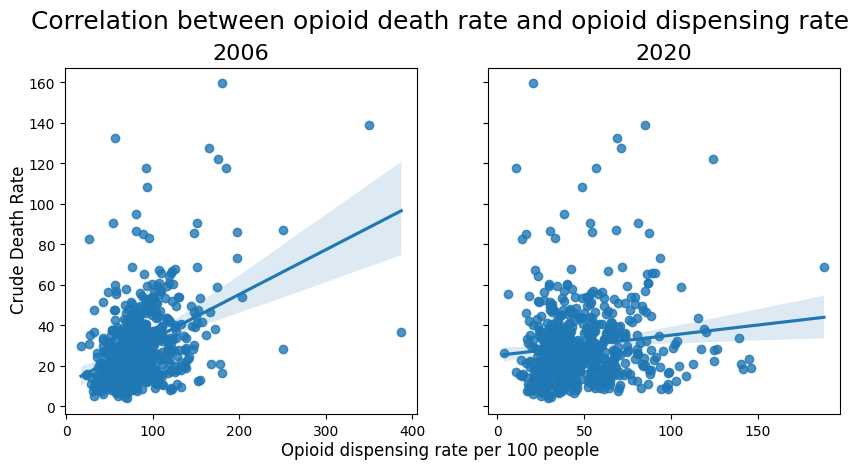

In [34]:
# plot 2006 and 2020 correlation between opioid death rate and opioid dispensing rate regression plots
# initialize a subplot
fig, ax = plt.subplots(1, 2, sharey = True, figsize=(10, 4.5))

# plot data on  the plots
sns.regplot(data=prescription_death_2006, x="Opioid Dispensing Rate per 100", y="Crude Rate", ax=ax[0])
sns.regplot(data=prescription_death, x="Opioid Dispensing Rate per 100", y="Crude Rate", ax=ax[1])
# disable all x and y-axis labels and set the title to correponding year
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].set_title("2006", size=16)
ax[1].set_xlabel("")
ax[1].set_ylabel("")
ax[1].set_title("2020", size=16)
# assign the plots an overall title and x- and y-axis labels
fig.suptitle("Correlation between opioid death rate and opioid dispensing rate", size=18, y=1.01)
fig.supxlabel("Opioid dispensing rate per 100 people", y = 0.01)
fig.supylabel("Crude Death Rate", x = 0.07)
plt.savefig("./visualization/2006v2020 opioid dispensing and od correlation.png", dpi=512, bbox_inches="tight");

### Question 4

In [36]:
# creating df with only geographic and rate of substance abuse facilities columns
mental_health_df = sdoh_df[["COUNTYFIPS", "STATE", "COUNTY", "AMFAR_MEDSAFAC_RATE"]]
mental_health_df.sample(5)

,COUNTYFIPS,STATE,COUNTY,AMFAR_MEDSAFAC_RATE
1727,31143,Nebraska,Polk County,0.0000
189,6003,California,Alpine County,0.0000
1490,29011,Missouri,Barton County,0.0863
3205,72113,Puerto Rico,Ponce Municipio,0.0078
2725,48401,Texas,Rusk County,0.0000


In [37]:
# showing null values in dataset
mental_health_df.isnull().sum()

COUNTYFIPS             0
STATE                  0
COUNTY                 0
AMFAR_MEDSAFAC_RATE    9
dtype: int64

In [38]:
# dropping rows with null values
mental_health_df = mental_health_df.dropna(subset=["AMFAR_MEDSAFAC_RATE"])

# converting FIPS code to float for merging purposes
mental_health_df.loc[:, "COUNTYFIPS"] = mental_health_df.COUNTYFIPS.astype(float)

In [39]:
# merging overdose death and substance abuse facility rate dataframes
death_mental_df = death_df.query("year==2020").merge(
    mental_health_df, left_on="County Code", right_on="COUNTYFIPS", how="inner"
)
death_mental_df.sample(5)

,County,County Code,Deaths,Population,Crude Rate,year,State,Rate,cls,COUNTYFIPS,STATE,COUNTY,AMFAR_MEDSAFAC_RATE
493,"Sullivan County, TN",47163.0,45.0,158755.0,28.350000,2020,TN,28.345564,c,47163.0,Tennessee,Sullivan County,0.0378
133,"Lake County, IL",17097.0,80.0,693593.0,11.530000,2020,IL,11.534142,a,17097.0,Illinois,Lake County,0.0260
113,"Clayton County, GA",13063.0,24.0,292646.0,8.200000,2020,GA,8.201035,a,13063.0,Georgia,Clayton County,0.0103
545,"Virginia Beach city, VA",51810.0,101.0,451231.0,22.379999,2020,VA,22.383214,b,51810.0,Virginia,Virginia Beach city,0.0155
126,"Kootenai County, ID",16055.0,21.0,170628.0,12.310000,2020,ID,12.307476,a,16055.0,Idaho,Kootenai County,0.0410


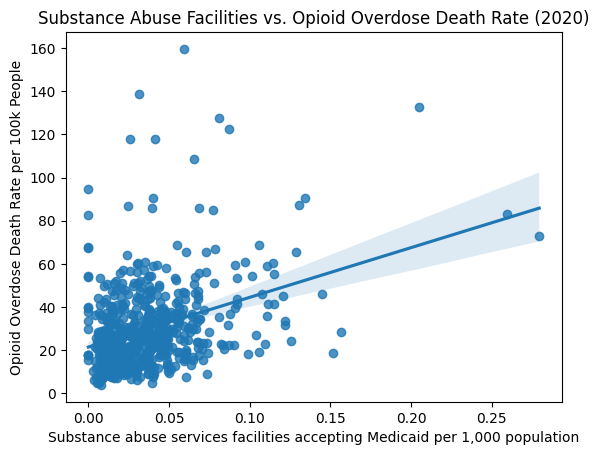

In [41]:
# creating regression plot of substance abuse facilities vs. opioid overdose death rate
sns.regplot(x='AMFAR_MEDSAFAC_RATE', y='Crude Rate', data=death_mental_df)
plt.title('Substance Abuse Facilities vs. Opioid Overdose Death Rate (2020)')
plt.xlabel('Substance abuse services facilities accepting Medicaid per 1,000 population')
plt.ylabel('Opioid Overdose Death Rate per 100k People')
plt.savefig("./visualization/saf v ood 2020.png", dpi=512);

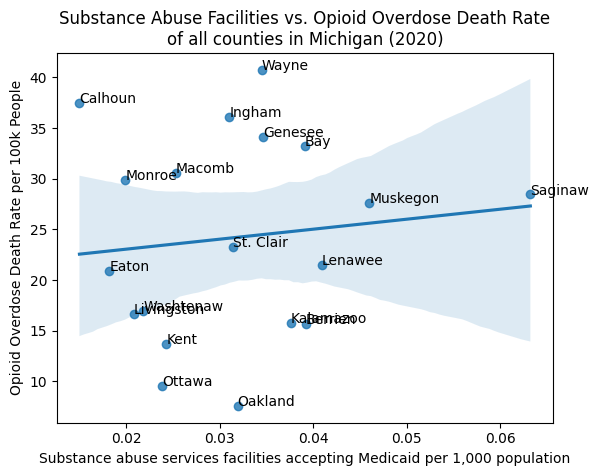

In [58]:
# creating regression plot of substance abuse facilities vs. opioid overdose death rate in Michigan
michigan_df = death_mental_df[death_mental_df.STATE == "Michigan"]

sns.regplot(x="AMFAR_MEDSAFAC_RATE", y="Crude Rate", data=michigan_df)

# plotting county names on graph
for i in range(len(michigan_df)):
    plt.text(
        michigan_df["AMFAR_MEDSAFAC_RATE"].iloc[i],
        michigan_df["Crude Rate"].iloc[i],
        michigan_df["COUNTY"].iloc[i][:-7],
    )

plt.title(
    "Substance Abuse Facilities vs. Opioid Overdose Death Rate\nof all counties in Michigan (2020)"
)
plt.xlabel(
    "Substance abuse services facilities accepting Medicaid per 1,000 population"
)
plt.ylabel("Opioid Overdose Death Rate per 100k People")
plt.savefig("./visualization/MI SAFvOOD.png", dpi=512);

In [43]:
# creating df with only geographic and percent of population in poverty columns
pov_df = sdoh_df[['COUNTYFIPS', 'STATE', 'COUNTY', 'SAIPE_PCT_POV']].copy()
pov_df.sample(5)

,COUNTYFIPS,STATE,COUNTY,SAIPE_PCT_POV
2412,46099,South Dakota,Minnehaha County,8.1
3193,72089,Puerto Rico,Luquillo Municipio,NaN
2183,40101,Oklahoma,Muskogee County,18.2
3102,55105,Wisconsin,Rock County,9.3
2090,39091,Ohio,Logan County,10.1


In [44]:
# dropping rows with null values
pov_df = pov_df.dropna(subset=['SAIPE_PCT_POV'])

# converting FIPS code to float for merging purposes
pov_df.loc[:, 'COUNTYFIPS'] = pov_df.COUNTYFIPS.astype(float)

In [45]:
# descriptive statistics for percent of population in poverty
pov_df.SAIPE_PCT_POV.describe()

count    3142.000000
mean       13.735360
std         5.422366
min         3.000000
25%         9.900000
50%        12.800000
75%        16.600000
max        43.900000
Name: SAIPE_PCT_POV, dtype: float64

In [46]:
# categorizing counties by percent of population in poverty
# low is less than or equal to 9.9% (25th percentile)
# high is greater than or equal to 16.6% (75th percentile)
pov_df['pov_cat'] = np.where(pov_df['SAIPE_PCT_POV'] <= 9.9, 'low', np.where(pov_df['SAIPE_PCT_POV'] >= 16.6, 'high', 'medium'))

In [47]:
# creating merged df with death and poverty data
death_pov_df = death_df.query("year == 2020").merge(pov_df, left_on='County Code', right_on='COUNTYFIPS', how='inner')
death_pov_df.sample(5)

,County,County Code,Deaths,Population,Crude Rate,year,State,Rate,cls,COUNTYFIPS,STATE,COUNTY,SAIPE_PCT_POV,pov_cat
135,"McHenry County, IL",17111.0,61.0,305888.0,19.940001,2020,IL,19.941940,b,17111.0,Illinois,McHenry County,6.3,low
487,"Putnam County, TN",47141.0,28.0,80929.0,34.599998,2020,TN,34.598228,c,47141.0,Tennessee,Putnam County,17.0,high
265,"Jefferson County, MO",29099.0,89.0,226543.0,39.290001,2020,MO,39.286140,c,29099.0,Missouri,Jefferson County,8.9,low
347,"Henderson County, NC",37089.0,28.0,118445.0,23.639999,2020,NC,23.639664,b,37089.0,North Carolina,Henderson County,11.0,medium
389,"Marion County, OH",39101.0,33.0,64820.0,50.910000,2020,OH,50.910213,d,39101.0,Ohio,Marion County,14.3,medium


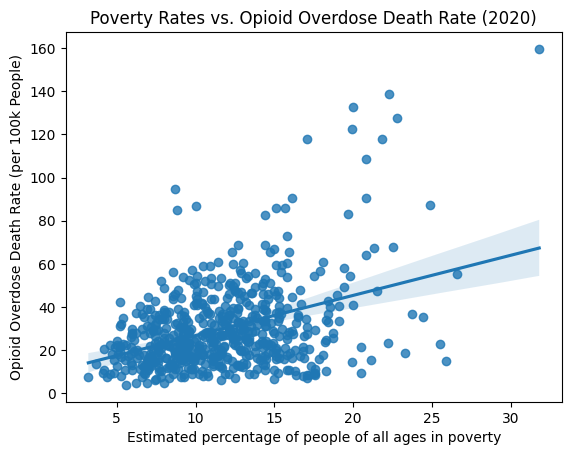

In [60]:
# creating regression plot of poverty rates vs. opioid overdose death rate
sns.regplot(x='SAIPE_PCT_POV', y='Crude Rate', data=death_pov_df)
plt.title('Poverty Rates vs. Opioid Overdose Death Rate (2020)')
plt.xlabel('Estimated percentage of people of all ages in poverty')
plt.ylabel('Opioid Overdose Death Rate (per 100k People)')
plt.savefig("./visualization/Poverty v OOD 2020.png", dpi=512);

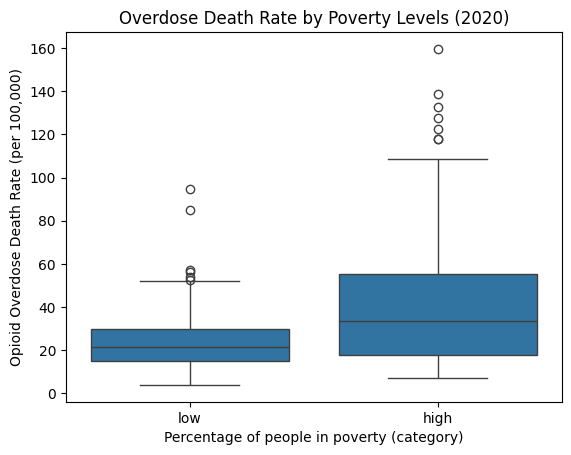

In [50]:
# filtering the data for low and high pov_cat (removing medium)
filtered_data = death_pov_df[death_pov_df['pov_cat'].isin(['low', 'high'])]

# creating boxplot of death rates by poverty levels
sns.boxplot(x='pov_cat', y='Crude Rate', data=filtered_data)
plt.title('Overdose Death Rate by Poverty Levels (2020)')
plt.xlabel('Percentage of people in poverty (category)')
plt.ylabel('Opioid Overdose Death Rate (per 100,000)')
plt.savefig("./visualization/od death vs poverty 2020 box.png", dpi=512);

### Question 5

In [51]:
# creating dataframe with only county and RUCC columns
rucc_df = sdoh_df[['COUNTYFIPS', 'AHRF_USDA_RUCC_2013']]

# converting FIPS code to float for merging purposes
rucc_df.loc[:, 'COUNTYFIPS'] = rucc_df['COUNTYFIPS'].astype(float)

# dropping columns with null values
rucc_df = rucc_df.dropna()

# RUCC codes 4-9 are typically considered rural
# labeling counties as rural or urban
rucc_df['Rural'] = rucc_df['AHRF_USDA_RUCC_2013'].apply(lambda x: 'Rural' if x >= 4 else 'Urban')
rucc_df.sample(5)

,COUNTYFIPS,AHRF_USDA_RUCC_2013,Rural
2305,42119.0,4.0,Rural
677,17161.0,2.0,Urban
2986,53063.0,2.0,Urban
1146,22063.0,2.0,Urban
987,20195.0,9.0,Rural


In [52]:
# creating merged df with death and RUCC data
rucc_death_df = death_df.query('year == 2020').merge(rucc_df, left_on='County Code', right_on='COUNTYFIPS', how='left')

In [56]:
# descriptive statistics for opioid death rate by rural/urban county
rucc_death_df.groupby('Rural')['Crude Rate'].describe()

,count,mean,std,min,25%,50%,75%,max
Rural,,,,,,,,
Rural,63.0,46.772224,27.683161,17.780001,30.520000,37.720001,55.525000,159.610001
Urban,526.0,27.930569,17.511866,3.880000,16.074999,24.115000,35.267502,132.559998


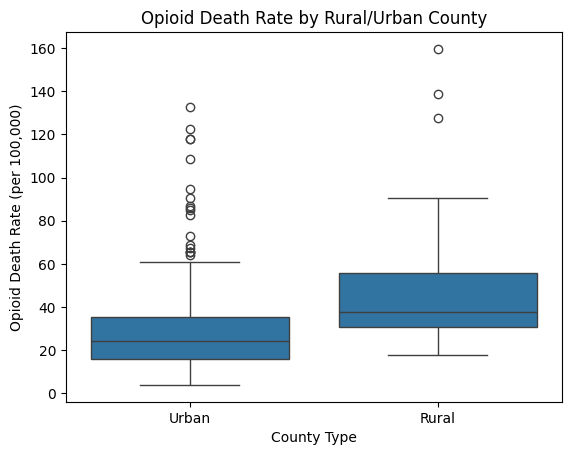

In [57]:
# Creating dataframe with only county and RUCC columns
rucc_df = sdoh_df[['COUNTYFIPS', 'AHRF_USDA_RUCC_2013']]
rucc_df.COUNTYFIPS = rucc_df.COUNTYFIPS.astype(float)
rucc_df = rucc_df.dropna()
# RUCC codes 4-9 are typically considered rural
rucc_df['Rural'] = rucc_df['AHRF_USDA_RUCC_2013'].apply(lambda x: 'Rural' if x >= 4 else 'Urban')
# Creating merged df with death and RUCC data
rucc_death_df = death_df.query("year == 2020").merge(rucc_df, left_on='County Code', right_on='COUNTYFIPS', how='left')
sns.boxplot(x="Rural", y="Crude Rate", data=rucc_death_df)
plt.title("Opioid Death Rate by Rural/Urban County")
plt.xlabel("County Type")
plt.ylabel("Opioid Death Rate (per 100,000)")
plt.savefig("./visualization/ood rate v. rurality boxplot.png", dpi=512);

In [61]:
# Use ANOVA to find if there is significant difference between rural and urban counties
# overdose death rate
g1 = rucc_death_df["Deaths"][rucc_death_df["Rural"] == "Urban"]
g2 = rucc_death_df["Deaths"][rucc_death_df["Rural"] == "Rural"]

# First, test for the data's normality and homoscedasticity and see if it 
# is suitable for doing an ANOVA
pd.DataFrame(
    {
        "Shapiro-Wilk's test of normality": stats.shapiro(rucc_death_df["Deaths"]),
        "Shapiro-Wilk's test of normality (Urban)": stats.shapiro(g1),
        "Shapiro-Wilk's test of normality (Rural)": stats.shapiro(g2),
        "Levene's test of homoscedasticity": stats.levene(g1, g2),
    },
    index=['Test Statistics', 'p-value']
).T # transpose dataframe for better readability 

,Test Statistics,p-value
Shapiro-Wilk's test of normality,0.513096,2.810572e-37
Shapiro-Wilk's test of normality (Urban),0.533053,4.915756e-35
Shapiro-Wilk's test of normality (Rural),0.735969,2.566978e-09
Levene's test of homoscedasticity,12.545833,4.286233e-04


In [62]:
# Use Welch's ANOVA on the data since ANOVA's 
# normality and homoscedasticity are violated
results = sm.stats.anova_oneway(
    data=rucc_death_df["Deaths"],
    groups=rucc_death_df["Rural"],
    use_var="unequal",
)

# format the results and display it as a data frame
pd.DataFrame({
    "Test statistics": results.statistic,
    "p-value": results.pvalue,
    "df": [str(results.df)]
}).T.rename(columns={0:"Welch's ANOVA Results"})

,Welch's ANOVA Results
Test statistics,119.917521
p-value,0.0
df,"(1.0, 577.6192673314)"


In [63]:
# Use ANOVA to find if there is significant difference between rural and urban counties
# overdose death count
g1 = rucc_death_df["Crude Rate"][rucc_death_df["Rural"] == "Urban"]
g2 = rucc_death_df["Crude Rate"][rucc_death_df["Rural"] == "Rural"]

# First, test for the data's normality and homoscedasticity and see if it 
# is suitable for doing an ANOVA
pd.DataFrame(
    {
        "Shapiro-Wilk's test of normality": stats.shapiro(rucc_death_df["Crude Rate"]),
        "Shapiro-Wilk's test of normality (Urban)": stats.shapiro(g1),
        "Shapiro-Wilk's test of normality (Rural)": stats.shapiro(g2),
        "Levene's test of homoscedasticity": stats.levene(g1, g2),
    },
    index=['Test Statistics', 'p-value']
).T # transpose dataframe for better readability 

,Test Statistics,p-value
Shapiro-Wilk's test of normality,0.818640,3.090459e-25
Shapiro-Wilk's test of normality (Urban),0.842722,1.991277e-22
Shapiro-Wilk's test of normality (Rural),0.775772,2.014604e-08
Levene's test of homoscedasticity,7.694655,5.714628e-03


In [64]:
# Use Welch's ANOVA on the data since ANOVA's 
# normality and homoscedasticity are violated
results = sm.stats.anova_oneway(
    data=rucc_death_df["Crude Rate"],
    groups=rucc_death_df["Rural"],
    use_var="unequal",
)

pd.DataFrame({
    "Test statistics": results.statistic,
    "p-value": results.pvalue,
    "df": [str(results.df)]
}).T.rename(columns={0:"Welch's ANOVA Results"})

,Welch's ANOVA Results
Test statistics,27.849405
p-value,0.000001
df,"(1.0, 68.06701325962426)"


### Multiple regression

In [74]:
# select the numerical variables from the prescription_death variable
# to conduct multiple regression
sdoh_reg = prescription_death[
    [
        "Crude Rate",
        "AMFAR_MEDSAFAC_RATE",
        "AMFAR_MEDMHFAC_RATE",
        "SAIPE_MEDIAN_HH_INCOME",
        "ACS_GINI_INDEX",
        "SAIPE_PCT_POV",
    ]
]
pipe = ColumnTransformer((("ss", StandardScaler(), sdoh_reg.columns),))

# reconstruct the dataframe and get ru_continuum data
sdoh_reg = pd.DataFrame(
    pipe.fit_transform(sdoh_reg),
    columns=pipe.named_transformers_.ss.get_feature_names_out(),
)
sdoh_reg = pd.concat([sdoh_reg, prescription_death["ru_continuum"]], axis=1)

# fit ordinary least square on the data
result = smf.ols(
    formula="Q('Crude Rate') ~ + Q('AMFAR_MEDSAFAC_RATE') + Q('AMFAR_MEDMHFAC_RATE') + Q('SAIPE_MEDIAN_HH_INCOME') + Q('ACS_GINI_INDEX') + Q('SAIPE_PCT_POV') + C(ru_continuum)",
    data=sdoh_reg,
).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q('Crude Rate')   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     34.61
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           8.29e-36
Time:                        17:05:05   Log-Likelihood:                -745.90
No. Observations:                 589   AIC:                             1506.
Df Residuals:                     582   BIC:                             1536.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.4137      0.116      3.566      0.000       0.186       0.642
C(ru_continuum)[T.Urban]       -0.4633      0.124     -3.746      0.000      -0.706      -0.220
Q('AMFAR_MEDSAFAC_RATE')        0.1781      0.046      3.885      0.000       0.088       0.268
Q('AMFAR_MEDMHFAC_RATE')        0.0981      0.045      2.157      0.031       0.009       0.187
Q('SAIPE_MEDIAN_HH_INCOME')    -0.0663      0.060     -1.096      0.274      -0.185       0.053
Q('ACS_GINI_INDEX')            -0.0449      0.043     -1.040      0.299      -0.130       0.040
Q('SAIPE_PCT_POV')              0.2708      0.067      4.034      0.000       0.139       0.403
==============================================================================
Omnibus:                      221.469   Durbin-Watson:                   1.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1015.303
Skew:                           1.647   Prob(JB):                    3.39e-221
Kurtosis:                       8.524   Cond. No.                         7.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Appendix: Work Distribution Summary
**Code**
- Analysis/visualizations for project questions 1 through 3 were completed by Randy
- Analysis/visualizations for project questions 4 and 5 were completed by Jessica

**Presentation**
- Introduction, questions 4 and 5, and conclusion were completed/presented by Jessica
- Data acquisition/preprocessing steps, questions 1-3, and multiple regression were completed by Randy

**Technical Report**
- Randy compiled the code and helped format the report in Markdown. He also contributed to the following sections: detailed project description, methodology and visualizations, ethics/limitations.
- Jessica helped format the report in Markdown and contributed to the following sections: Project overview, stakeholders, objective, methodology and visualizations, ethics/limitations, conclusions, future work.

## Appendix: References
2020 Poverty Guidelines. (n.d.). ASPE. https://aspe.hhs.gov/topics/poverty-economic-mobility/poverty-guidelines/prior-hhs-poverty-guidelines-federal-register-references/2020-poverty-guidelines

*Addressing Substance Use Disorder in Appalachia.* (2023, February 16). Appalachian Regional Commission. https://www.arc.gov/addressing-substance-abuse-in-appalachia/#:~:text=The%20nation's%20substance%20use%20disorder,the%20rest%20of%20the%20country.

Altekruse, S. F., Cosgrove, C. M., Altekruse, W. C., Jenkins, R. A., & Blanco, C. (2020). Socioeconomic risk factors for fatal opioid overdoses in the United States: Findings from the Mortality Disparities in American Communities Study (MDAC). *PloS one, 15*(1), e0227966. https://doi.org/10.1371/journal.pone.0227966

Brewer, C. A., & Pickle, L. (2002). Evaluation of Methods for Classifying Epidemiological Data on Choropleth Maps in Series. *Annals of the Association of American Geographers, 92*(4), 662–681. https://doi.org/10.1111/1467-8306.00310

Chen, Q., Larochelle, M. R., Weaver, D. T., Lietz, A. P., Mueller, P. P., Mercaldo, S., Wakeman, S. E., Freedberg, K. A., Raphel, T. J., Knudsen, A. B., Pandharipande, P. V., & Chhatwal, J. (2019). Prevention of Prescription Opioid Misuse and Projected Overdose Deaths in the United States. *JAMA Network Open, 2*(2), e187621. https://doi.org/10.1001/jamanetworkopen.2018.7621

Dowell, D., Haegerich, T. M., & Chou, R. (2016). CDC Guideline for Prescribing Opioids for Chronic Pain - United States, 2016. *MMWR. Recommendations and reports : Morbidity and mortality weekly report. Recommendations and reports, 65*(1), 1–49. https://doi.org/10.15585/mmwr.rr6501e1

Dowell, D., Ragan, K. R., Jones, C. M., Baldwin, G. T., & Chou, R. (2022). CDC Clinical Practice Guideline for Prescribing Opioids for Pain - United States, 2022. *MMWR. Recommendations and reports : Morbidity and mortality weekly report. Recommendations and reports, 71*(3), 1–95. https://doi.org/10.15585/mmwr.rr7103a1

Haffajee, R. L., Lin, L. A., Bohnert, A. S. B., & Goldstick, J. E. (2019). Characteristics of US Counties With High Opioid Overdose Mortality and Low Capacity to Deliver Medications for Opioid Use Disorder. *JAMA Network Open, 2*(6), e196373. https://doi.org/10.1001/jamanetworkopen.2019.6373

Mattson, C. L., Tanz, L. J., Quinn, K., Kariisa, M., Patel, P., & Davis, N. L. (2021). Trends and Geographic Patterns in Drug and Synthetic Opioid Overdose Deaths - United States, 2013-2019. *MMWR. Morbidity and mortality weekly report, 70*(6), 202–207. https://doi.org/10.15585/mmwr.mm7006a4

Schieber, L. Z., Guy, G. P., Seth, P., Young, R., Mattson, C. L., Mikosz, C. A., & Schieber, R. A. (2019). Trends and Patterns of Geographic Variation in Opioid Prescribing Practices by State, United States, 2006-2017. *JAMA Network Open, 2*(3), e190665. https://doi.org/10.1001/jamanetworkopen.2019.0665

Spencer, M. R., M. P. H., Garnett, M., M. P. H., & Miniño, A., M. P. H. (2022). Urban–Rural Differences in Drug Overdose Death Rates, 2020. In *National Center for Health Statistics (No. 440).* Center for Disease Control and Prevention. Retrieved November 23, 2023, from https://www.cdc.gov/nchs/data/databriefs/db440.pdf

USDA ERS - Rural-Urban Continuum Codes. (n.d.). https://www.ers.usda.gov/data-products/rural-urban-continuum-codes/

*What is Fentanyl?* (2023, November 9). National Institute on Drug Abuse. https://nida.nih.gov/research-topics/trends-statistics/infographics/what-fentanyl